In [1]:
library(SparkR)


Attaching package: ‘SparkR’

The following objects are masked from ‘package:stats’:

    cov, filter, lag, na.omit, predict, sd, var, window

The following objects are masked from ‘package:base’:

    as.data.frame, colnames, colnames<-, drop, endsWith, intersect,
    rank, rbind, sample, startsWith, subset, summary, transform, union



In [2]:
library(magrittr)

In [3]:
library(ggplot2)

In [4]:
sc <- sparkR.init(master = "local")

Warning message:
“'sparkR.init' is deprecated.
Use 'sparkR.session' instead.
See help("Deprecated")”

Launching java with spark-submit command /usr/local/spark/bin/spark-submit   sparkr-shell /tmp/RtmpBj2RLC/backend_porta43c549ff 


In [5]:
sqlContext <- sparkRSQL.init(sc)

Warning message:
“'sparkRSQL.init' is deprecated.
Use 'sparkR.session' instead.
See help("Deprecated")”

In [21]:
# this is to demo using a folder for data
save(quakes, file = "resources/quakes.rdata")
load("resources/quakes.rdata")

In [22]:
quakesDF <- createDataFrame(sqlContext, quakes)

Warning message:
“'createDataFrame(sqlContext...)' is deprecated.
Use 'createDataFrame(data, schema = NULL)' instead.
See help("Deprecated")”

In [8]:
printSchema(quakesDF)

root
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- depth: integer (nullable = true)
 |-- mag: double (nullable = true)
 |-- stations: integer (nullable = true)


In [18]:
depthByMag <- quakesDF %>% group_by("mag") %>% avg("depth") %>% withColumnRenamed("avg(depth)", "avgDepth")

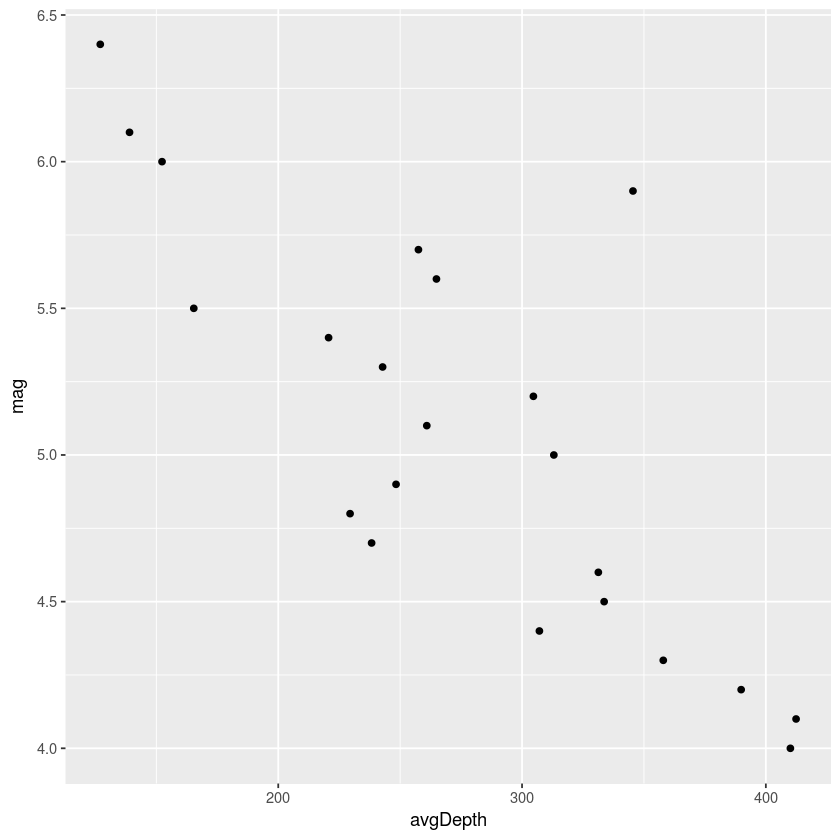

In [19]:
ggplot(collect(depthByMag), aes(avgDepth, mag)) + geom_point() 